In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./emnist-byclass-test.csv', header=None)
all_data = df.to_numpy(copy=True)
all_data.shape

(116323, 785)

In [4]:
X = all_data[:, 1:]/255.0
y = all_data[:, 0]
X.shape, y.shape

((116323, 784), (116323,))

18


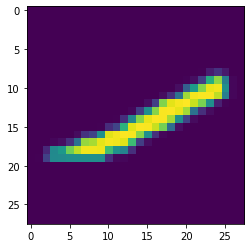

In [5]:
print(y[0])
plt.imshow(X[0].reshape(28, 28))

In [6]:
data_by_label = {}
for i in set(y):
    data_by_label[i] = []
for i, item in enumerate(y):
    data_by_label[item].append(X[i].tolist())
for k in data_by_label.keys():
    print(k, len(data_by_label[k]))

0 5778
1 6330
2 5869
3 5969
4 5619
5 5190
6 5705
7 6139
8 5633
9 5686
10 1062
11 648
12 1739
13 779
14 851
15 1440
16 447
17 521
18 2048
19 626
20 382
21 810
22 1485
23 1351
24 4156
25 1397
26 413
27 809
28 3508
29 1576
30 2002
31 796
32 806
33 432
34 798
35 464
36 1644
37 853
38 432
39 1683
40 4092
41 400
42 589
43 1479
44 427
45 317
46 466
47 2535
48 464
49 1898
50 466
51 368
52 505
53 2320
54 437
55 2965
56 482
57 468
58 467
59 470
60 381
61 451


In [7]:
NUM_USER = 62
NUM_LABEL_PER_USER = 10
NUM_LABEL = 62
INTERVAL = int(NUM_USER*NUM_LABEL_PER_USER/NUM_LABEL)
INTERVAL

10

In [8]:
np.random.seed(1)
range_in_label = []

for i in range(NUM_LABEL):
    tmp = []
    total = len(data_by_label[i])
    for j in range(INTERVAL-1):
        val = np.random.randint(total//(INTERVAL + 1), total//2)
        tmp.append(val)
        total -= val
    tmp.append(total)
    range_in_label.append(tmp)

range_in_label

[[1586, 616, 1421, 962, 501, 265, 171, 102, 14, 140],
 [719, 639, 2448, 978, 648, 362, 226, 48, 124, 138],
 [785, 1130, 757, 852, 793, 356, 579, 289, 125, 203],
 [1652, 533, 1761, 190, 485, 656, 63, 266, 41, 322],
 [1238, 2075, 836, 564, 203, 93, 126, 175, 98, 211],
 [1808, 822, 1196, 621, 110, 133, 71, 91, 110, 228],
 [1401, 1712, 250, 276, 383, 178, 503, 317, 215, 470],
 [2198, 1404, 1229, 244, 375, 217, 207, 81, 54, 130],
 [1160, 1718, 1001, 246, 380, 450, 135, 239, 73, 231],
 [1444, 1560, 938, 479, 484, 330, 169, 102, 22, 158],
 [148, 85, 151, 210, 49, 115, 99, 93, 22, 90],
 [101, 69, 73, 72, 133, 25, 60, 14, 27, 74],
 [254, 404, 108, 367, 179, 119, 35, 48, 94, 131],
 [218, 211, 171, 81, 38, 14, 22, 5, 2, 17],
 [207, 278, 136, 30, 72, 43, 25, 27, 9, 24],
 [457, 265, 119, 69, 181, 51, 145, 61, 30, 62],
 [181, 121, 66, 27, 14, 3, 10, 10, 2, 13],
 [196, 125, 43, 63, 22, 19, 24, 6, 8, 15],
 [903, 288, 101, 205, 244, 98, 72, 17, 46, 74],
 [304, 50, 64, 95, 37, 23, 21, 15, 1, 16],
 [79, 

In [15]:
count = 1304
while True:
    try:
        np.random.seed(count)
        count += 1
        all_user = {}
        flag1 = [0]*NUM_LABEL
        flag2 = [0]*NUM_LABEL
        available_label = set(list(range(NUM_LABEL)))

        for i in range(NUM_USER):
            all_user[str(i)] = {}

            labels = np.random.choice(a=list(available_label), size=(NUM_LABEL_PER_USER,), replace=False)
            for label in labels:
                tmp = flag1[label]
                tmp_ = tmp + range_in_label[label][flag2[label]]
                all_user[str(i)][int(label)] = data_by_label[label][tmp:tmp_]
                flag1[label] = tmp_
                flag2[label] += 1
                if flag2[label] == INTERVAL:
                    available_label.remove(label)
        break
    except:
        print(count, end=' ')

0 10
38: 161 61: 71 8: 1160 19: 304 45: 150 42: 284 6: 1401 57: 45 9: 1444 24: 939 

1 10
8: 1718 4: 1238 27: 248 28: 975 33: 189 41: 157 13: 218 24: 883 44: 44 15: 457 

2 10
42: 139 50: 159 5: 1808 21: 375 19: 50 4: 2075 44: 130 8: 1001 9: 1560 16: 181 

3 10
51: 151 54: 186 58: 188 59: 188 52: 141 8: 246 15: 265 14: 207 21: 167 47: 1137 

4 10
12: 254 1: 719 45: 15 22: 603 47: 572 0: 1586 23: 150 43: 366 57: 92 9: 938 

5 10
31: 342 10: 148 19: 64 16: 121 32: 144 26: 71 17: 196 43: 506 51: 46 46: 94 

6 10
20: 79 6: 1712 35: 115 23: 331 58: 103 40: 1821 51: 65 16: 66 27: 184 8: 380 

7 10
57: 127 53: 1073 35: 83 55: 647 49: 200 45: 35 19: 95 46: 135 7: 2198 58: 86 

8 10
5: 822 15: 119 47: 345 61: 184 43: 113 25: 398 34: 197 36: 691 39: 515 0: 616 

9 10
5: 1196 11: 101 4: 836 34: 97 1: 639 50: 108 22: 163 37: 316 16: 27 24: 381 

10 10
11: 69 10: 85 33: 113 43: 171 42: 17 30: 685 24: 797 41: 58 9: 479 55: 898 

11 10
57: 81 18: 903 28: 554 40: 543 48: 193 54: 99 13: 211 50: 28 0: 1

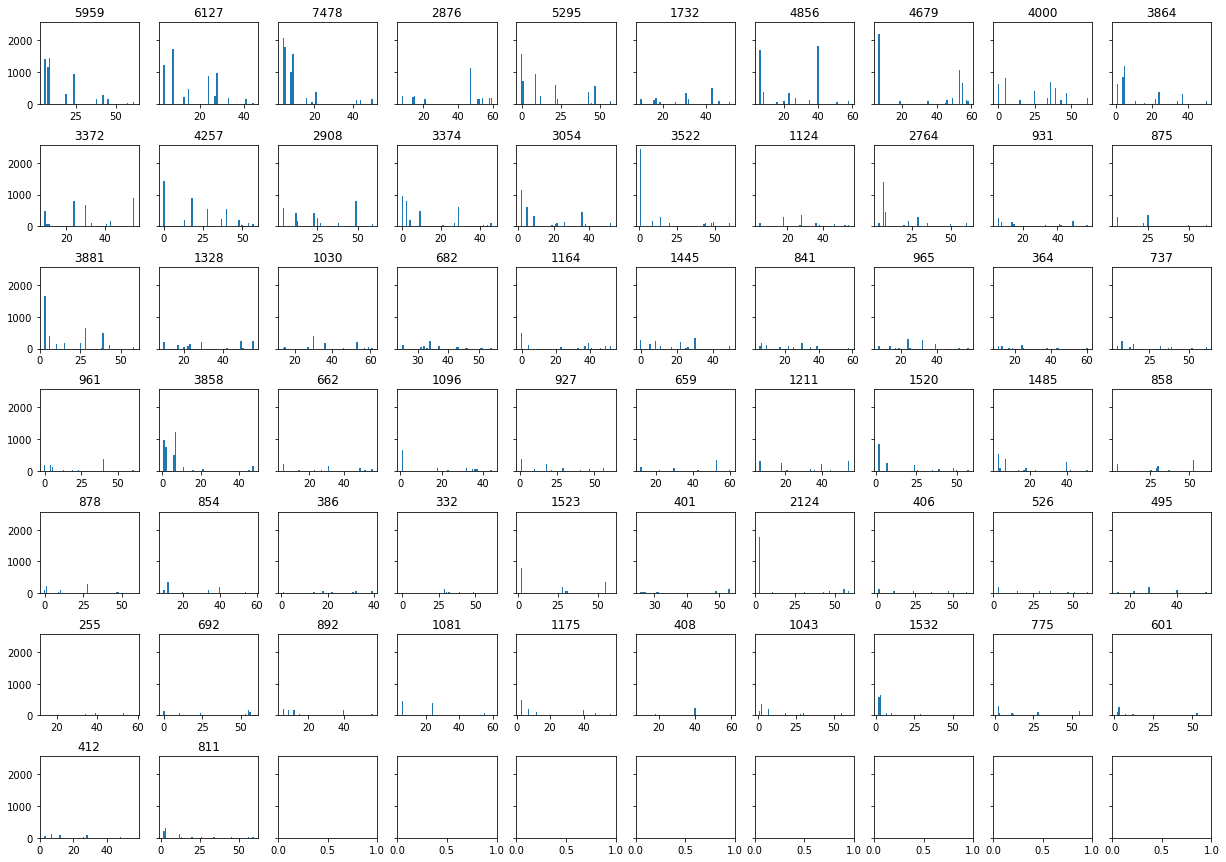

In [17]:
def check(all_client):
    fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(21, 15), sharey=True)
    fig.subplots_adjust(hspace=0.5)

    for i, key in enumerate(all_client.keys()):
        print(key, len(all_client[key]))
        for j in all_client[key].keys():
            print(f'{j}: {len(all_client[key][j])}', end=' ')
        print('\n')

        x = list(all_client[key].keys())
        y = [len(all_client[key][t]) for t in all_client[key].keys()]
        axes[int(i/10), int(i % 10)].bar(x=x, height=y)
        axes[int(i/10), int(i%10)].set_title(sum(y))

check(all_user)

In [18]:
def write_to_file(client_dict: dict):
    all_train_data = {}
    all_test_data = {}

    users = list(client_dict.keys())
    all_train_data['users'] = users
    all_test_data['users'] = users

    num_train_samples = []
    num_test_samples = []
    train_user_data = {}
    test_user_data = {}
    for user in users:
        train_user_data[user] = {}
        test_user_data[user] = {}

        train_user_data[user]['x'] = []
        train_user_data[user]['y'] = []
        test_user_data[user]['x'] = []
        test_user_data[user]['y'] = []

        for key in client_dict[user].keys():
            len_x = len(client_dict[user][key])
            p = int(0.75*len_x)

            train_user_data[user]['x'].extend(client_dict[user][key][:p])
            train_user_data[user]['y'].extend([key]*p)

            test_user_data[user]['x'].extend(client_dict[user][key][p:])
            test_user_data[user]['y'].extend([key]*(len_x - p))

        num_train_samples.append(len(train_user_data[user]['y']))
        num_test_samples.append(len(test_user_data[user]['y']))

    all_train_data['num_samples'] = num_train_samples
    all_test_data['num_samples'] = num_test_samples
    all_train_data['user_data'] = train_user_data
    all_test_data['user_data'] = test_user_data

    with open('./train_json/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
    with open('./test_json/test.json', 'w') as outfile:
        json.dump(all_test_data, outfile)
        
write_to_file(all_user)